In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')
# target = Exited

# 0 - not exited
# 1 - exited

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.shape

(10000, 18)

In [5]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
df.duplicated().sum()

0

### dataset description 
https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [8]:
# RowNumber CustomerId Surname is not useful
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
cat_columns = [col for col in df.columns if df[col].dtype == 'object']
print(cat_columns)
num_columns = [col for col in df.columns if df[col].dtype != 'object']
print(num_columns)

['Geography', 'Gender', 'Card Type']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned']


In [10]:
df[['CreditScore','Age','Tenure','Balance','EstimatedSalary','Satisfaction Score','Point Earned']].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,57510.492818,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,11.580000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,199992.480000,5.000000,1000.000000


In [11]:
df.describe(include='object')

,Geography,Gender,Card Type
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


In [12]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464


## Univariate analysis

#### CreditScore

<Axes: xlabel='CreditScore', ylabel='Density'>

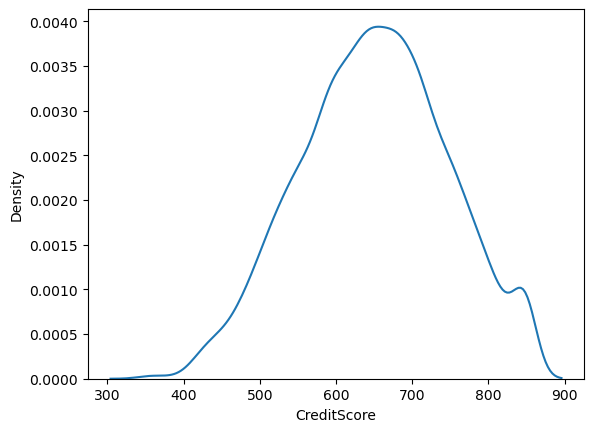

In [13]:
sns.kdeplot(data=df,x='CreditScore')

<Axes: xlabel='CreditScore'>

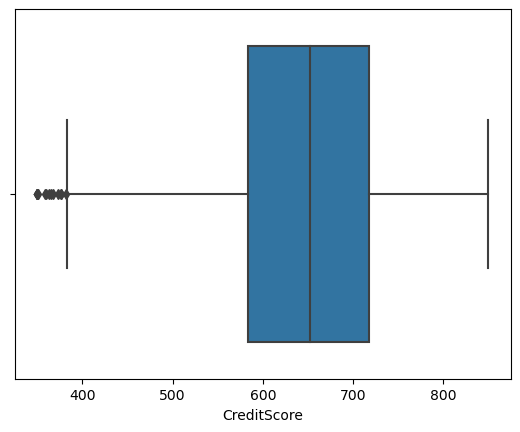

In [14]:
sns.boxplot(data=df,x='CreditScore')

In [15]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

<Axes: xlabel='CreditScore', ylabel='Density'>

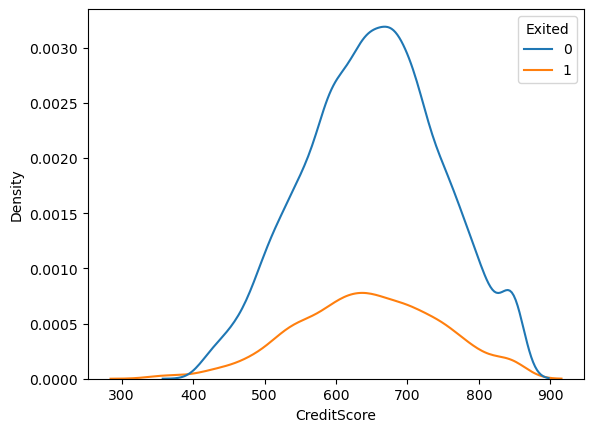

In [16]:
sns.kdeplot(data=df,x='CreditScore', hue='Exited')

In [17]:
## customer with high CreditScore is less likely to leave the bank ?

## According to CNBC, a credit score of 670 to 739 is considered good, while a score of 740 to 799 is considered very good.
## But this may differ according to age group

In [18]:
# sampling the data since the dataset is imbalanced

cus_0 = df[df['Exited'] == 0].sample(150)
cus_1 = df[df['Exited'] == 1].sample(150)

temp_df = pd.concat([cus_0,cus_1])

In [19]:
temp_df[temp_df['CreditScore'] > 740]['Exited'].value_counts()

Exited
0    35
1    28
Name: count, dtype: int64

- The credit score doesnot seems to have influence in customer churn
- Data is distributed normally

#### Geopgraphy

In [20]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [21]:
pd.crosstab(df['Geography'], df['Exited'])

Exited,0,1
Geography,,
France,4203,811
Germany,1695,814
Spain,2064,413


In [22]:
# creating the stratifed samples

france = temp_df[temp_df['Geography'] == 'France'].sample(50)
germany = temp_df[temp_df['Geography'] == 'Germany'].sample(50)
spain = temp_df[temp_df['Geography'] == 'Spain'].sample(50)

country = pd.concat([france , germany, spain])

In [23]:
pd.crosstab(country['Geography'], country['Exited'],normalize=True)

Exited,0,1
Geography,,
France,0.206667,0.126667
Germany,0.126667,0.206667
Spain,0.140000,0.193333


- Germany seems to have a higher churn rate
- France have high retention rate

#### Gender

In [24]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [25]:
pd.crosstab(df['Gender'],df['Exited'],normalize = True)

Exited,0,1
Gender,,
Female,0.3404,0.1139
Male,0.4558,0.0899


- Females have exited more than males

In [26]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464


#### Age

In [27]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

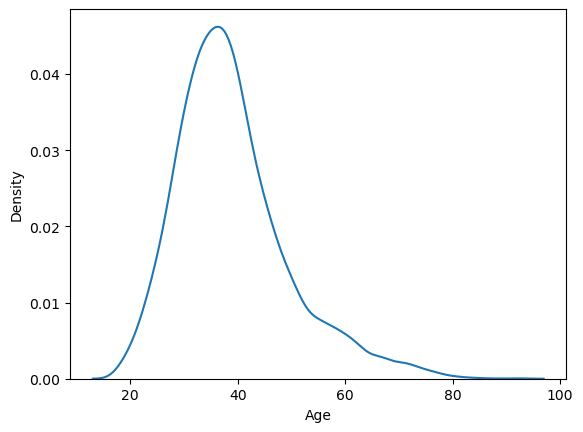

In [28]:
sns.kdeplot(data = df, x='Age')

<Axes: xlabel='Age'>

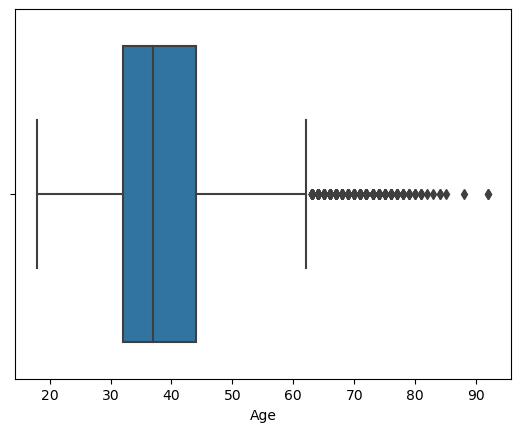

In [29]:
sns.boxplot(data = df, x='Age')

In [30]:
df.groupby('Exited')['Age'].mean()

Exited
0    37.408063
1    44.835623
Name: Age, dtype: float64

In [31]:
temp_df.groupby('Exited')['Age'].mean()

Exited
0    35.946667
1    45.306667
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

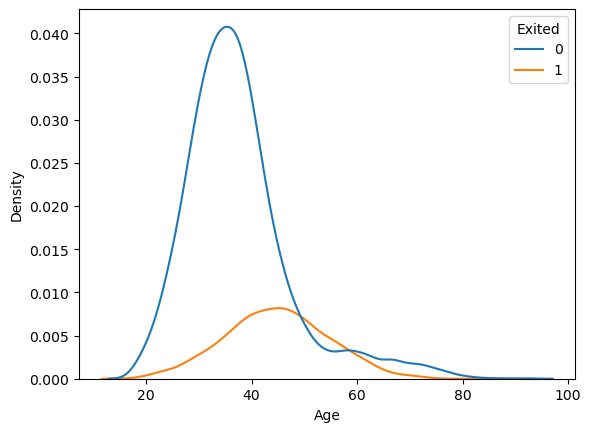

In [32]:
sns.kdeplot(data=df,x='Age',hue='Exited')

- Age is Right skewed

#### Tenure

In [33]:
df['Tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

<Axes: xlabel='Tenure', ylabel='count'>

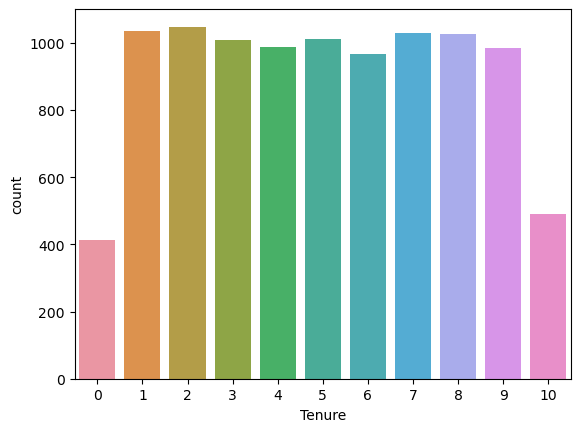

In [34]:
sns.countplot(data=df,x='Tenure')

In [35]:
df.groupby('Exited')['Tenure'].mean()

Exited
0    5.032781
1    4.934740
Name: Tenure, dtype: float64

In [36]:
temp_df[temp_df['Tenure'].isin([1,2,3,4])]['Exited'].value_counts()

Exited
0    65
1    63
Name: count, dtype: int64

In [37]:
temp_df[temp_df['Tenure'].isin([5,6,7,8,9,10])]['Exited'].value_counts()

Exited
1    81
0    77
Name: count, dtype: int64

- The new customer as well as old customer are leaving at the same rate 

In [38]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

### Balance

In [39]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

<Axes: xlabel='Balance', ylabel='Density'>

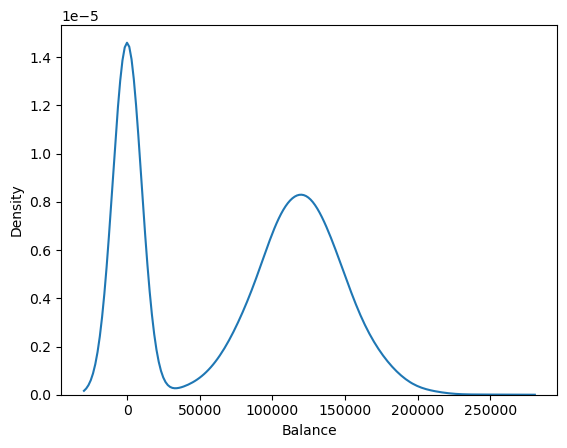

In [40]:
sns.kdeplot(data=df,x='Balance')

In [41]:
df_0 = temp_df[temp_df['Balance'] == 0.0 ]
df_not_0 = temp_df[temp_df['Balance'] != 0.0]

In [42]:
df_0['Exited'].value_counts()

Exited
0    55
1    32
Name: count, dtype: int64

In [43]:
df_not_0['Exited'].value_counts()

Exited
1    118
0     95
Name: count, dtype: int64

- 25% of the Balance is 0.0 and rest of others mostly starts from 50000
- people with 0.0 balance are less likely to leave

### NumOfProducts

- example:- banking accounts, ATMs, loans, foreign exchange, credit card etc

In [44]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [45]:
df_1 = df[df['NumOfProducts'] == 1]
df_2 = df[df['NumOfProducts'] == 2]

In [46]:
df_1['Exited'].value_counts()

Exited
0    3675
1    1409
Name: count, dtype: int64

In [47]:
df_2['Exited'].value_counts()

Exited
0    4241
1     349
Name: count, dtype: int64

In [48]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

- People using 2 products of bank has exited less than those using only 1 product

### HasCrCard

In [49]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [50]:
pd.crosstab(df['HasCrCard'], df['Exited'], normalize = True)

Exited,0,1
HasCrCard,,
0,0.2332,0.0613
1,0.5630,0.1425


### IsActiveMember

In [51]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [52]:
pd.crosstab(df['Exited'],df['IsActiveMember'],normalize=True)

IsActiveMember,0,1
Exited,,
0,0.3546,0.4416
1,0.1303,0.0735


### EstimatedSalary

In [53]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

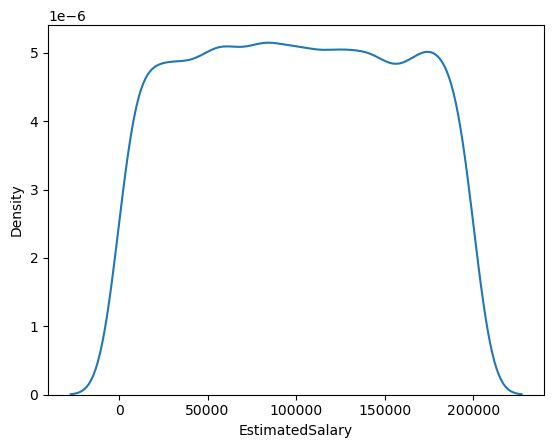

In [54]:
sns.kdeplot(df['EstimatedSalary'])

<Axes: >

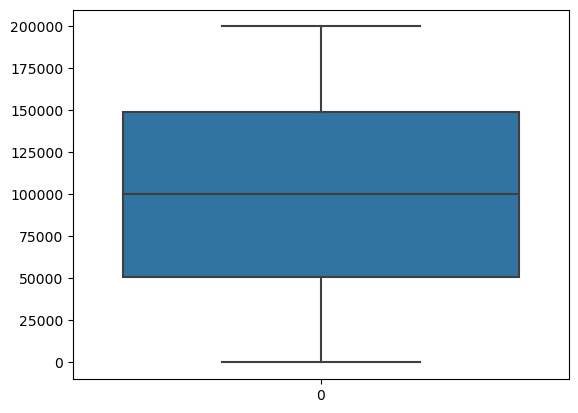

In [55]:
sns.boxplot(df['EstimatedSalary'])

In [56]:
df_salary = temp_df[temp_df['EstimatedSalary'] > 50000]

df_salary['Exited'].value_counts()

Exited
0    116
1    116
Name: count, dtype: int64

### Complain

In [57]:
df['Complain'].value_counts()

Complain
0    7956
1    2044
Name: count, dtype: int64

In [58]:

df_com_0 = df[df['Complain'] == 0].sample(1000)
df_com_1 = df[df['Complain'] == 1].sample(1000)
df_com = pd.concat([df_com_0 , df_com_1])

In [59]:
pd.crosstab(df_com['Complain'], df_com['Exited'])

Exited,0,1
Complain,,
0,1000,0
1,3,997


-  out of 1000 people with complain 998 have exited and out of 1000 people with no complain no one has exited so Complain is highly correlated with Exited

### Satisfaction Score

In [60]:
df['Satisfaction Score'].value_counts()

Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64

In [61]:
df[df['Satisfaction Score'].isin([5])]['Exited'].value_counts()

Exited
0    1607
1     397
Name: count, dtype: int64

In [62]:
df[df['Satisfaction Score'].isin([1,2])]['Exited'].value_counts()

Exited
0    3120
1     826
Name: count, dtype: int64

In [63]:
df[df['Satisfaction Score'].isin([3,4,5])]['Exited'].value_counts()

Exited
0    4842
1    1212
Name: count, dtype: int64

-  more satisfied customer are also leaving at the same rate as less satisfied customer

### Card Type

In [64]:
df['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [65]:
pd.crosstab(df['Card Type'], df['Exited'])

Exited,0,1
Card Type,,
DIAMOND,1961,546
GOLD,2020,482
PLATINUM,1987,508
SILVER,1994,502


- Card Type doesnot make any difference

### Point Earned

In [66]:
df['Point Earned'].describe()

count    10000.000000
mean       606.515100
std        225.924839
min        119.000000
25%        410.000000
50%        605.000000
75%        801.000000
max       1000.000000
Name: Point Earned, dtype: float64

<Axes: xlabel='Point Earned', ylabel='Density'>

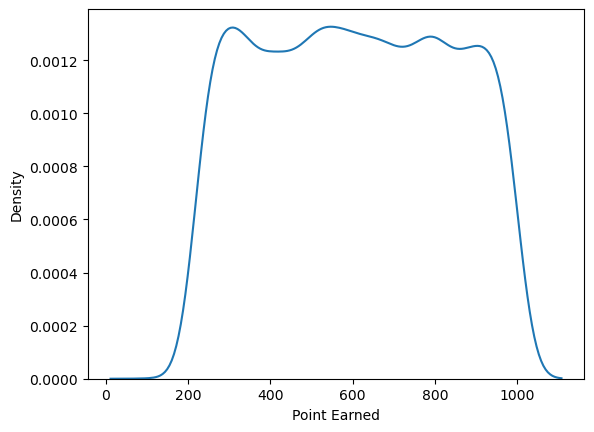

In [67]:
sns.kdeplot(df['Point Earned'])

In [68]:
temp_df.groupby('Exited')['Point Earned'].mean()

Exited
0    616.293333
1    620.880000
Name: Point Earned, dtype: float64

### Observation

- The credit score doesnot seems to have influence in customer churn
- Germany seems to have a higher churn rate
- France have high retention rate 
- France occupy 50% of data
- Females have exited more than males
- Age is Right skewed
- Data mostly have Tenure value of 1 and 2 , 3 and 4 only makes total of 326 points
- The new customer as well as old customer are leaving at the same rate
- 25% of the Balance is 0.0 and rest of others mostly starts from 50000
- people with 0.0 balance are less likely to leave
- HasCrCard is unbalance most data points doesnot have cr card
- EstimatedSalary is normally distributed and ranges from (10 - 200000)
- Complain is also unbalanced, most values are 0
- out of 1000 people with complain 998 have exited and out of 1000 people with no complain no one has exited so Complain is highly posittively correlated with Exited
-  more satisfied customer are also leaving at the same rate as less satisfied customer
- Card Type doesnot make any difference
- The average point Earned by people who did not leave is 639 to that of people who leaved is 599, so there is not much difference